In [1]:
import os
import datetime
from datetime import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:

custom_date_parser = lambda x: datetime.strptime(x, "%Y.%m.%d_%H.%M.%S")
df = pd.read_csv ('./data/A_2017.12.03_10.09.56_J5_static.csv',parse_dates=['Timestamp'],
                date_parser=custom_date_parser)

df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
#datetime.head(3)
timestamp_s = df.pop('Timestamp')
df.head(3)

,Speed,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,ServingCell_Distance
0,0,-121,-17,-7,5,-94,3153,85,928.09
1,0,-121,-17,-7,5,-94,2717,50,928.09
2,0,-119,-17,-7,6,-94,2784,52,928.09


In [3]:

dfw = pd.read_csv ('./data/A_2017.12.01_21.56.26_j5_walking.csv',parse_dates=['Timestamp'],
                date_parser=custom_date_parser)

dfw['Timestamp'] = dfw['Timestamp'].apply(lambda x: x.value)
#datetime.head(3)
timestamp_walk = dfw.pop('Timestamp')
dfw.head(3)

,Speed,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,ServingCell_Distance
0,2,-105,-13,4,8,-90,76,16,706.91
1,2,-105,-10,4,8,-88,4039,153,706.91
2,2,-105,-10,4,7,-88,13051,302,706.91


In [54]:


dfc = pd.read_csv ('./data/B_2017.12.14_07.27.18_j5_car.csv',parse_dates=['Timestamp'],
                date_parser=custom_date_parser)

dfc['Timestamp'] = dfc['Timestamp'].apply(lambda x: x.value)

#datetime.head(3)
timestamp_car = dfc.pop('Timestamp')
dfc.head(20)

,Speed,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,ServingCell_Distance
0,33,-83,-12,10,9,-66,9001,188,402.79
1,33,-83,-12,9,9,-66,22936,409,402.79
2,33,-83,-12,9,14,-62,17525,353,402.79
3,33,-79,-10,18,14,-70,14293,285,402.79
4,33,-79,-10,18,14,-70,16966,307,402.79
5,33,-88,-10,18,14,-70,9719,209,402.79
6,33,-88,-10,18,12,-72,14874,272,402.79
7,33,-89,-10,18,11,-75,16429,297,402.79
8,33,-89,-10,18,12,-71,17379,312,402.79
9,33,-88,-9,19,12,-71,14629,272,402.79


In [55]:
df.shape
timestamp_s.shape

(1002,)

In [56]:
dfw.shape
timestamp_walk.shape

(671,)

In [57]:
dfc.shape
timestamp_car.shape

(1447,)

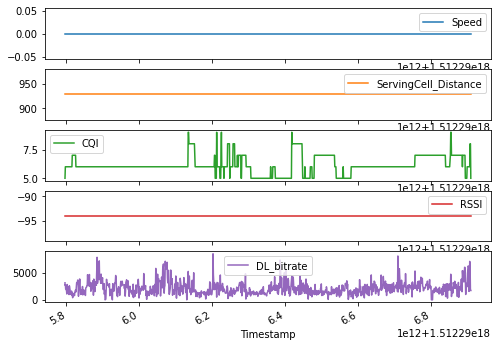

In [58]:
plot_cols = ['Speed','ServingCell_Distance','CQI','RSSI','DL_bitrate']
plot_features = df[plot_cols]
plot_features.index = timestamp_s
_ = plot_features.plot(subplots=True)


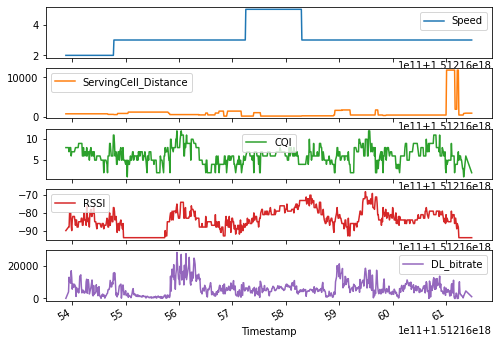

In [59]:

plot_features = dfw[plot_cols]
plot_features.index = timestamp_walk
_ = plot_features.plot(subplots=True)

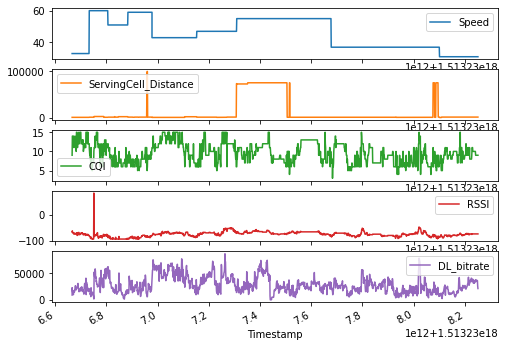

In [60]:

plot_features = dfc[plot_cols]
plot_features.index = timestamp_car
_ = plot_features.plot(subplots=True)

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Speed,1002.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RSRP,1002.0,-120.498004,1.186208,-124.000000,-121.000000,-121.000000,-120.000000,-118.000000
RSRQ,1002.0,-17.284431,1.093043,-19.000000,-18.000000,-17.000000,-17.000000,-14.000000
SNR,1002.0,-4.317365,1.994768,-7.000000,-6.000000,-5.000000,-3.000000,2.000000
CQI,1002.0,6.143713,0.781470,5.000000,6.000000,6.000000,6.000000,9.000000
RSSI,1002.0,-94.000000,0.000000,-94.000000,-94.000000,-94.000000,-94.000000,-94.000000
DL_bitrate,1002.0,2146.469062,1194.885516,0.000000,1353.000000,1923.000000,2684.000000,8499.000000
UL_bitrate,1002.0,50.083832,27.651010,0.000000,31.000000,45.000000,62.000000,220.000000
ServingCell_Distance,1002.0,928.090000,0.000000,928.090000,928.090000,928.090000,928.090000,928.090000
Min sin,1002.0,-0.001757,0.708112,-1.000000,-0.712108,0.015264,0.697614,1.000000


In [12]:
dfw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Speed,671.0,3.165425,0.805427,2.00,3.00,3.00,3.00,5.00
RSRP,671.0,-101.842027,8.311407,-131.00,-104.00,-101.00,-97.00,-84.00
RSRQ,671.0,-14.853949,2.200301,-21.00,-16.00,-15.00,-13.00,-8.00
SNR,671.0,-2.044709,4.269059,-12.00,-5.00,-2.00,1.00,9.00
CQI,671.0,6.146051,2.053641,1.00,5.00,6.00,7.00,12.00
RSSI,671.0,-83.788376,5.848581,-94.00,-87.00,-84.00,-80.00,-68.00
DL_bitrate,671.0,6253.157973,4733.792844,0.00,2829.00,5390.00,8013.00,28329.00
UL_bitrate,671.0,131.850969,99.472648,0.00,66.00,110.00,167.00,657.00
ServingCell_Distance,671.0,880.672370,1770.207633,114.92,388.32,424.76,899.37,11857.73


In [13]:
dfc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Speed,1648.0,39.662621,17.243434,0.00,37.00,43.0,55.00,60.00
RSRP,1648.0,-92.328277,8.694135,-122.00,-98.00,-92.0,-87.00,-64.00
RSRQ,1648.0,-11.362864,1.675388,-16.00,-12.00,-12.0,-10.00,-6.00
SNR,1648.0,11.015777,7.070535,-12.00,6.00,11.0,17.00,26.00
CQI,1648.0,9.847087,2.640981,3.00,8.00,10.0,12.00,15.00
RSSI,1648.0,-75.283981,9.372449,-94.00,-81.00,-75.0,-70.00,85.00
DL_bitrate,1648.0,27343.132888,15091.907875,0.00,16582.25,23967.0,34983.25,86888.00
UL_bitrate,1648.0,517.833738,278.747960,0.00,314.00,462.0,661.00,1577.00
ServingCell_Distance,1648.0,9809.389290,24319.223103,51.06,488.90,795.8,1032.16,100004.17


Text(0.5, 1.0, 'Training and Validation Accuracy')

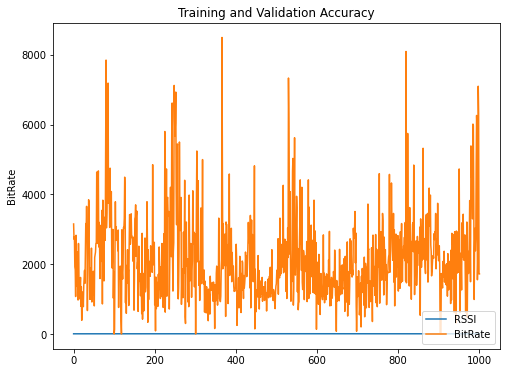

In [14]:
acc = df['CQI']
val_acc = df['DL_bitrate']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
plt.plot(acc, label='RSSI')
plt.plot(val_acc, label='BitRate')
plt.legend(loc='lower right')
plt.ylabel('BitRate')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

#plt.plot(df,["ServingCell_Distance" "DL_bitrate"])


Text(0.5, 1.0, 'Training and Validation Accuracy')

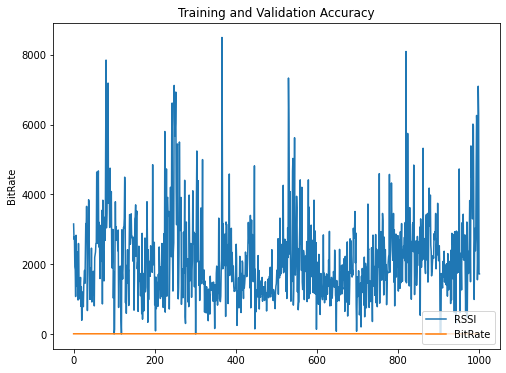

In [15]:
acc = df['DL_bitrate']
val_acc = df['CQI']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
plt.plot(acc, label='RSSI')
plt.plot(val_acc, label='BitRate')
plt.legend(loc='lower right')
plt.ylabel('BitRate')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

#plt.plot(df,["ServingCell_Distance" "DL_bitrate"])


Text(0.5, 1.0, 'Training and Validation Accuracy')

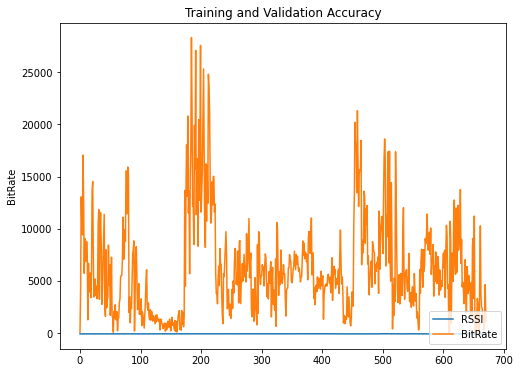

In [16]:
acc = dfw['RSSI']
val_acc = dfw['DL_bitrate']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
plt.plot(acc, label='RSSI')
plt.plot(val_acc, label='BitRate')
plt.legend(loc='lower right')
plt.ylabel('BitRate')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

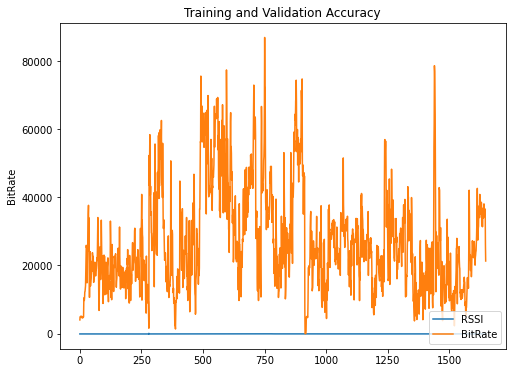

In [17]:
acc = dfc['RSSI']
val_acc = dfc['DL_bitrate']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
plt.plot(acc, label='RSSI')
plt.plot(val_acc, label='BitRate')
plt.legend(loc='lower right')
plt.ylabel('BitRate')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

/var/folders/9q/lpwrq5l50g30h13lqz5lfr3m0000gn/T/ipykernel_7474/355983258.py:12: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('snr1','snr2')
/var/folders/9q/lpwrq5l50g30h13lqz5lfr3m0000gn/T/ipykernel_7474/355983258.py:12: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('snr1','snr2')
/var/folders/9q/lpwrq5l50g30h13lqz5lfr3m0000gn/T/ipykernel_7474/355983258.py:12: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('snr1','snr2')
/var/folders/9q/lpwrq5l50g30h13lqz

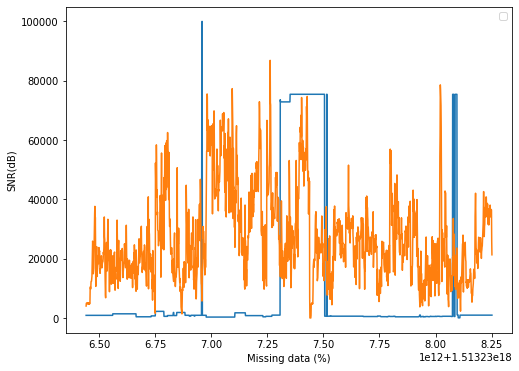

In [18]:
missingData = timestamp_car
snr1= dfc['ServingCell_Distance']
plt.xlabel('Missing data (%)')
plt.ylabel('SNR(dB)')
#plot(missingData,snr1)

missingData = timestamp_car
snr2=dfc['DL_bitrate']
plt.xlabel('Missing data (%)')
plt.ylabel('SNR(dB)')
#plot(missingData,snr2) 
plt.legend('snr1','snr2')

plt.plot(missingData,snr1,missingData,snr2)

plt.show()

In [19]:
minute = 60
hour = 60*60

df['Min sin'] = np.sin(timestamp_s * (2 * np.pi / minute))
df['Min cos'] = np.cos(timestamp_s * (2 * np.pi / minute))
df['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))

In [20]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

print(column_indices)

{'Speed': 0, 'RSRP': 1, 'RSRQ': 2, 'SNR': 3, 'CQI': 4, 'RSSI': 5, 'DL_bitrate': 6, 'UL_bitrate': 7, 'ServingCell_Distance': 8, 'Min sin': 9, 'Min cos': 10, 'Hour sin': 11, 'Hour cos': 12}


Text(0.5, 1.0, 'Time of day signal')

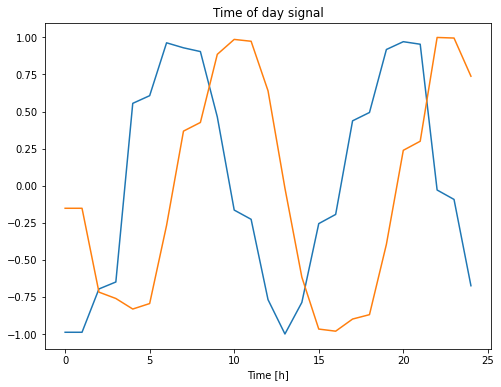

In [21]:
plt.plot(np.array(df['Min sin'])[:25])
plt.plot(np.array(df['Min cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [37]:
fft = tf.signal.rfft(df['RSSI'])


In [38]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print(column_indices)

{'Speed': 0, 'RSRP': 1, 'RSRQ': 2, 'SNR': 3, 'CQI': 4, 'RSSI': 5, 'DL_bitrate': 6, 'UL_bitrate': 7, 'ServingCell_Distance': 8, 'Min sin': 9, 'Min cos': 10, 'Hour sin': 11, 'Hour cos': 12}


In [39]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

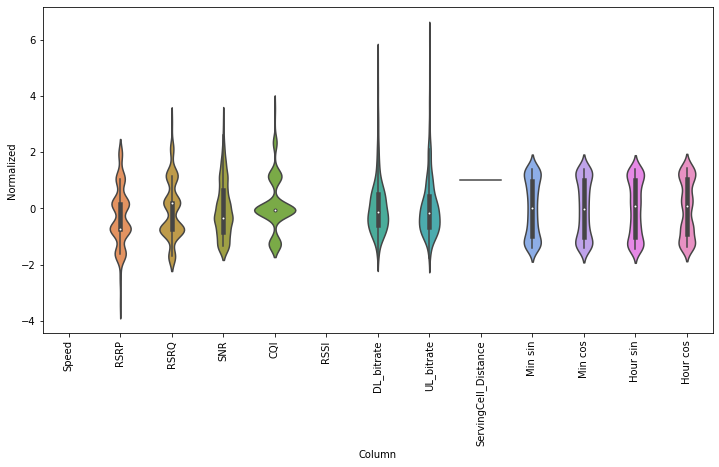

In [40]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [41]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [42]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Battery'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Battery']

In [43]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Battery'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Battery']

In [44]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [45]:
w2.total_window_size

7

In [46]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

KeyError: 'Battery'

In [47]:
w2.example = example_inputs, example_labels

NameError: name 'example_inputs' is not defined

In [48]:
def plot(self, model=None, plot_col='Battery', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')

WindowGenerator.plot = plot

In [49]:
w2.plot()

AttributeError: 'WindowGenerator' object has no attribute 'example'

In [50]:
w2.plot(plot_col='CPU Frequency')

AttributeError: 'WindowGenerator' object has no attribute 'example'

In [51]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [52]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [35]:
w2.train.element_spec

KeyError: in user code:

    File "/var/folders/9q/lpwrq5l50g30h13lqz5lfr3m0000gn/T/ipykernel_7474/1500409093.py", line 5, in split_window  *
        labels = tf.stack(

    KeyError: 'Battery'


In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Battery'])
single_step_window

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [36]:
baseline = Baseline(label_index=column_indices['Battery'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

NameError: name 'Baseline' is not defined

In [ ]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=2,
    label_columns=['Battery'])

wide_window

In [ ]:
wide_window.plot(baseline)

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print(linear._get_trainable_state())

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

In [ ]:
linear.summary()

In [ ]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=20):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

In [ ]:
wide_window.plot(linear)

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

In [ ]:
CONV_WIDTH = 30
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Battery'])

conv_window

In [ ]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)
IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Battery'])

wide_conv_window

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

In [ ]:
wide_conv_window.plot(conv_model)

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

In [ ]:
history = compile_and_fit(lstm_model, wide_window)
#lstm_model.save('lstm_model.pt')
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

In [ ]:
wide_window.plot(lstm_model)

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Battery, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
print(val_performance)

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

In [ ]:
print(multi_performance)

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [ ]:
print(multi_val_performance)

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [ ]:
print(multi_val_performance)

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
multi_val_performance.values()

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [ ]:
print(multi_val_performance.values())

In [ ]:

x = np.arange(len(multi_performance))
width = 0.3
print(multi_performance.values())
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[1] for v in multi_val_performance.values()]
test_mae = [v[1] for v in multi_val_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()



In [ ]:
for name, value in multi_val_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')